In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


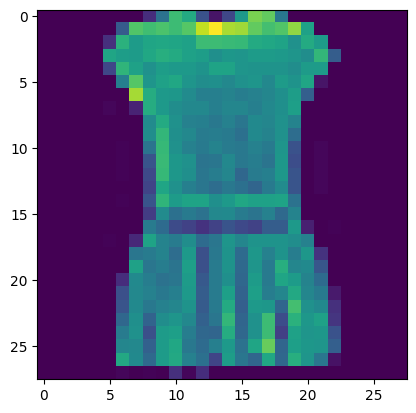

In [3]:
plt.imshow(x_train[3])

In [4]:
# Next, we will preprocess the data by scaling the pixel values to be between 0 and 1, and then reshaping the images to be 28x28 pixels.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape


(60000, 28, 28, 1)

In [8]:
x_test.shape


(10000, 28, 28, 1)

In [9]:
y_train.shape


(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
# We will use a convolutional neural network (CNN) to classify the fashion items.
# The CNN will consist of multiple convolutional layers followed by max pooling,
# dropout, and dense layers. Here is the code for the model:

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # 32 filters (default), randomly initialized
    # 3*3 is Size of Filter
    # 28,28,1 size of Input Image
    # No zero-padding: every output 2 pixels less in every dimension
    # in Paramter shwon 320 is value of weights: (3x3 filter weights + 32 bias) * 32 filters
    # 32*3*3=288(Total)+32(bias)= 320


    keras.layers.MaxPooling2D((2,2)),
    # It shown 13 * 13 size image with 32 channel or filter or depth.

    keras.layers.Dropout(0.25),
    # Reduce Overfitting of Training sample drop out 25% Neuron

    keras.layers.Conv2D(64, (3,3), activation='relu'),


    keras.layers.MaxPooling2D((2,2)),


    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3,3), activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),


    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile and Train the Model
# After defining the model, we will compile it and train it on the training data.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.7075 - loss: 0.7843 - val_accuracy: 0.8606 - val_loss: 0.3823
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8579 - loss: 0.3894 - val_accuracy: 0.8789 - val_loss: 0.3242
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.8780 - loss: 0.3308 - val_accuracy: 0.8868 - val_loss: 0.3087
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8884 - loss: 0.3018 - val_accuracy: 0.8978 - val_loss: 0.2775
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8975 - loss: 0.2770 - val_accuracy: 0.8969 - val_loss: 0.2993
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9000 - loss: 0.2686 - val_accuracy: 0.9034 - val_loss: 0.2606
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9059 - loss: 0.2539 - val_accuracy: 0.9081 - val_loss: 0.2531
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9115 -

In [ ]:
# Finally, we will evaluate the performance of the model on the test data.

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)